In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [114]:
df = pdr.get_data_fred('ICNSA')

In [115]:
df.head()

,ICNSA
DATE,
2019-02-09,242762
2019-02-16,210679
2019-02-23,203049
2019-03-02,220540
2019-03-09,209302


<Axes: xlabel='DATE'>

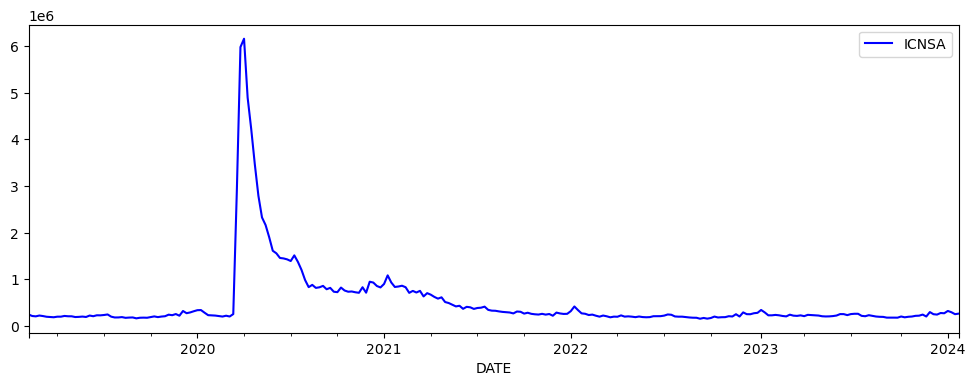

In [116]:
# plotting the dataset
df.plot(figsize=(12,4),c='blue')

<Axes: xlabel='DATE'>

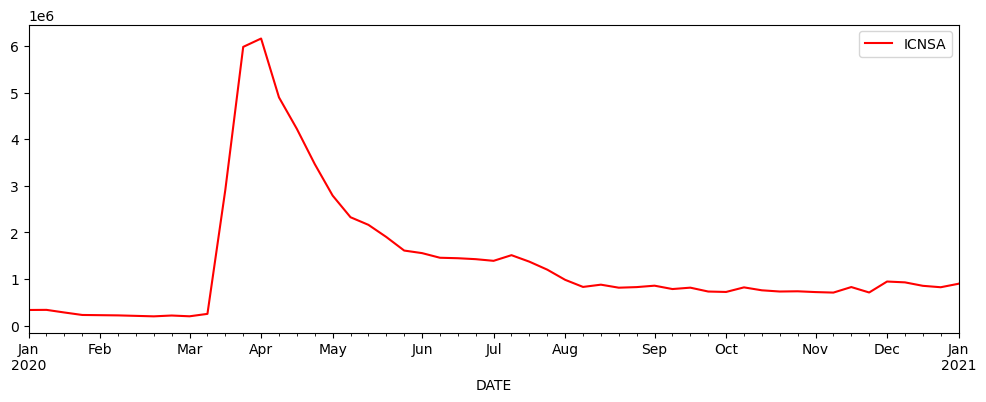

In [117]:
# we can see a spike during the covid times suggesting high insurance claims
df.plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,4),c='red')

Text(0, 0.5, 'Claim Values')

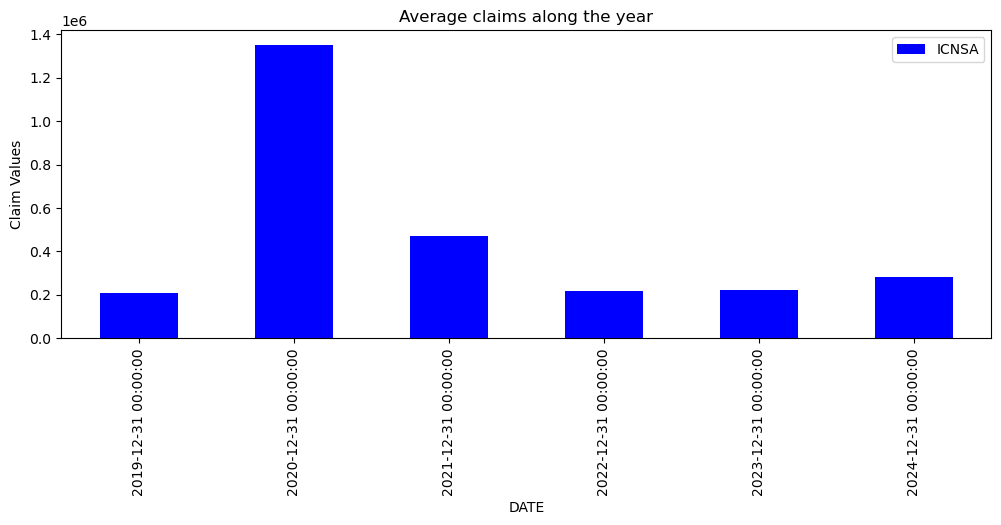

In [122]:
df.resample(rule='A').mean().plot(kind='bar',figsize=(12,4),color=['blue'])
plt.title('Average claims along the year')
plt.ylabel('Claim Values')

Text(0.5, 1.0, 'Original Claims with EWMA claims')

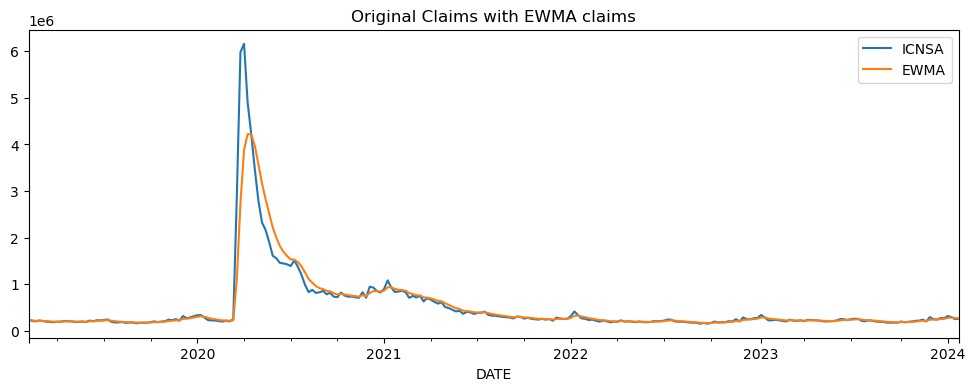

In [129]:
df['EWMA'] = df['ICNSA'].ewm(span=5).mean()
df.plot(figsize=(12,4))
plt.title('Original Claims with  EWMA claims')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2019-02-09 to 2024-01-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ICNSA   260 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


In [7]:
df.reset_index(level=0, inplace=True,names='ds')
df.rename(columns = {'ICNSA':'y'}, inplace = True)
df.head()

,ds,y
0,2019-02-09,242762
1,2019-02-16,210679
2,2019-02-23,203049
3,2019-03-02,220540
4,2019-03-09,209302


In [8]:
len(df)

260

In [94]:
train_data = df.iloc[:211]
test_data = df.iloc[211:]
print(len(train_data))
print(len(test_data))

211
49


In [95]:
train_data.head()

,ds,y
0,2019-02-09,242762
1,2019-02-16,210679
2,2019-02-23,203049
3,2019-03-02,220540
4,2019-03-09,209302


In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      211 non-null    datetime64[ns]
 1   y       211 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


Text(0.5, 1.0, 'Training data')

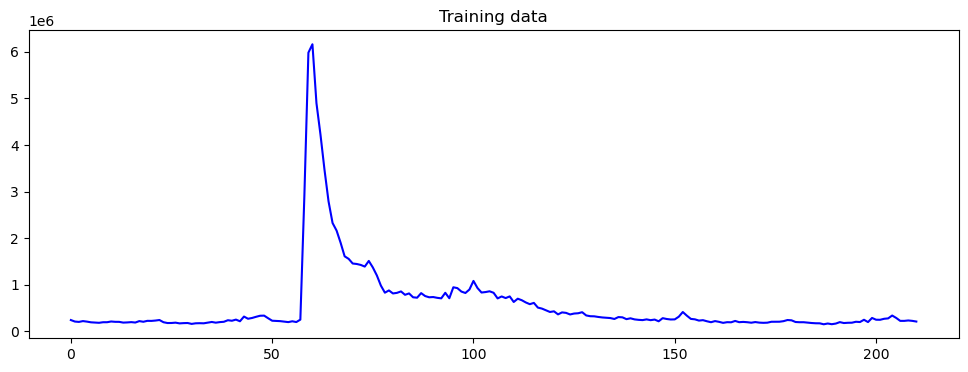

In [97]:
train_data['y'].plot(figsize=(12,4),c='blue')
plt.title('Training data')

In [98]:
# Handling extreme values during COVID years using winsorization
from scipy.stats.mstats import winsorize
train_data['y'] = winsorize(train_data['y'],(0.1,0.4))

C:\Users\princ\AppData\Local\Temp\ipykernel_1412\120331123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = winsorize(train_data['y'],(0.1,0.4))


<Axes: >

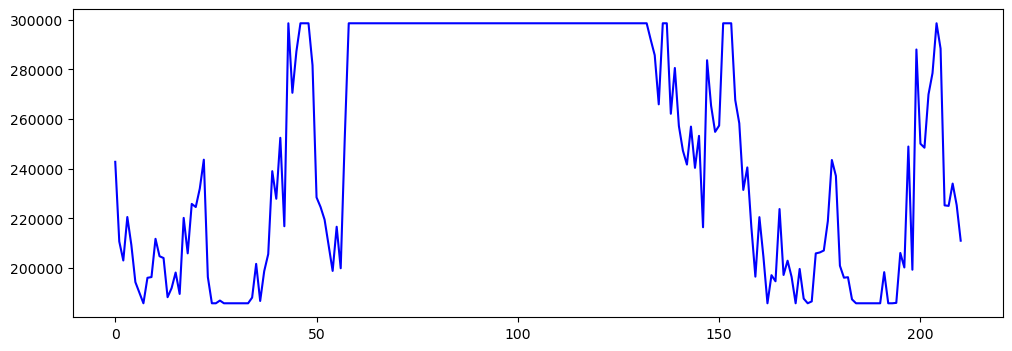

In [99]:
train_data['y'].plot(figsize=(12,4),c='blue')

In [100]:
test_data.head()

,ds,y
211,2023-02-25,202156
212,2023-03-04,238840
213,2023-03-11,218084
214,2023-03-18,213003
215,2023-03-25,224193


In [101]:
model = Prophet() 

In [102]:
model.fit(train_data)

11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:18 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=49,freq='W-SAT')
future_dates.tail()

,ds
255,2023-12-30
256,2024-01-06
257,2024-01-13
258,2024-01-20
259,2024-01-27


In [104]:
prediction = model.predict(future_dates)

In [105]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-09,188165.946966,154521.357647,216401.297524,188165.946966,188165.946966,-2169.353782,-2169.353782,-2169.353782,-2169.353782,-2169.353782,-2169.353782,0.0,0.0,0.0,185996.593184
1,2019-02-16,189497.159633,154609.822416,215498.442701,189497.159633,189497.159633,-4277.337029,-4277.337029,-4277.337029,-4277.337029,-4277.337029,-4277.337029,0.0,0.0,0.0,185219.822604
2,2019-02-23,190828.372301,147959.383751,209387.119578,190828.372301,190828.372301,-10227.110866,-10227.110866,-10227.110866,-10227.110866,-10227.110866,-10227.110866,0.0,0.0,0.0,180601.261435
3,2019-03-02,192159.584968,144828.570289,205698.865361,192159.584968,192159.584968,-16834.821886,-16834.821886,-16834.821886,-16834.821886,-16834.821886,-16834.821886,0.0,0.0,0.0,175324.763082
4,2019-03-09,193490.797635,145119.863446,206544.565796,193490.797635,193490.797635,-17915.725919,-17915.725919,-17915.725919,-17915.725919,-17915.725919,-17915.725919,0.0,0.0,0.0,175575.071717


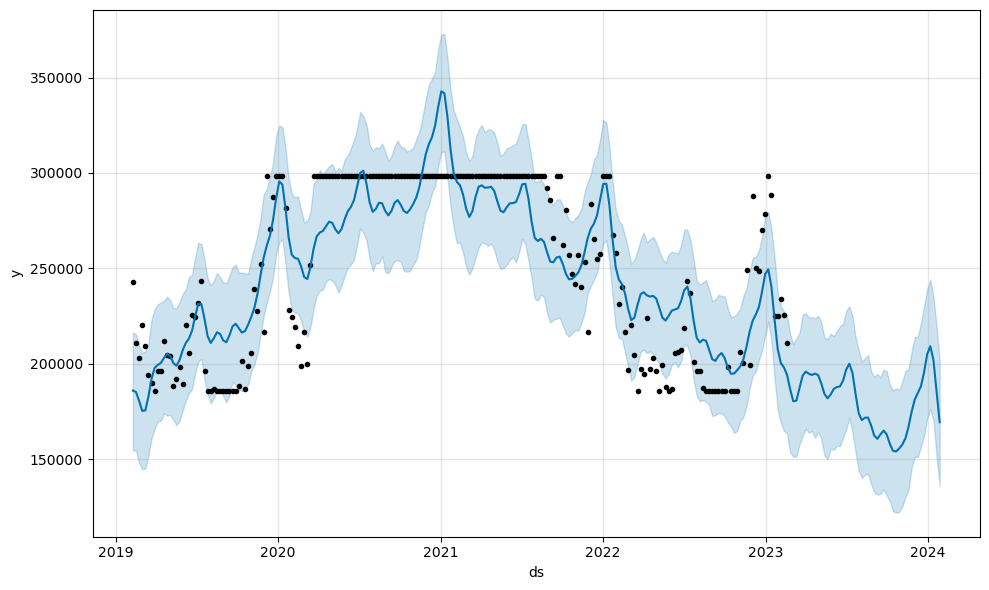

In [106]:
model.plot(prediction);

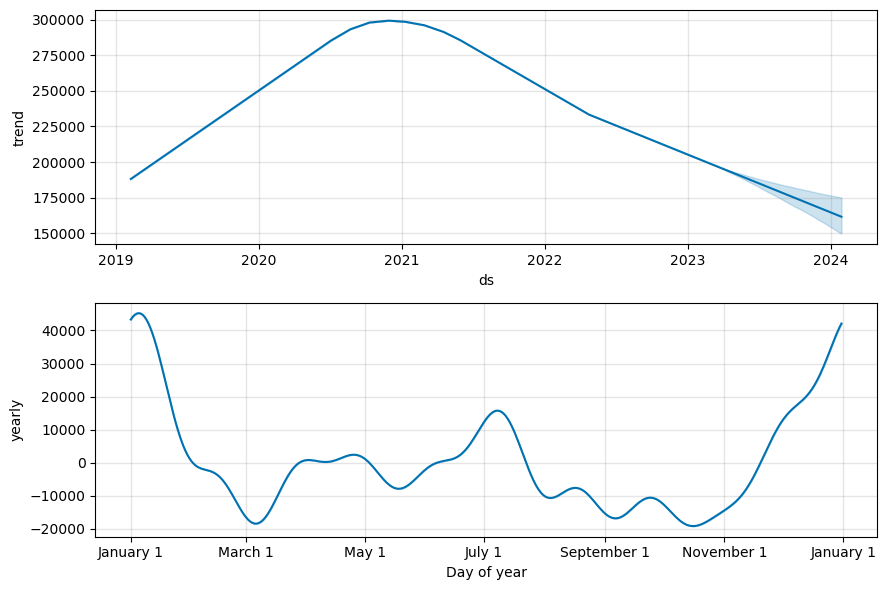

In [107]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

<Axes: xlabel='ds'>

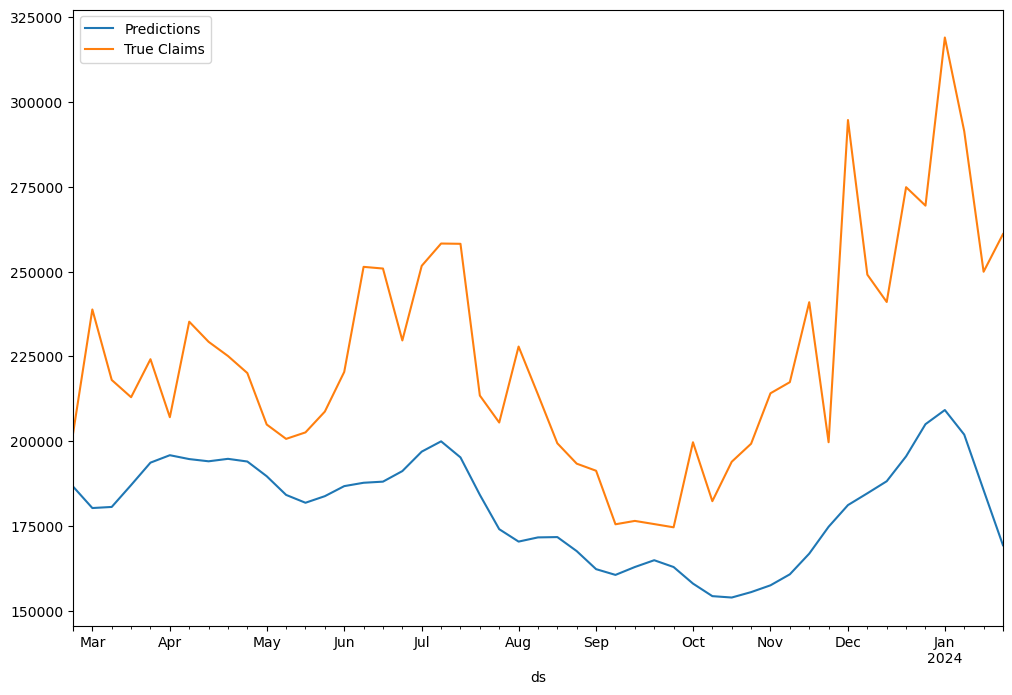

In [108]:
ax = prediction[211:].plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test_data.plot(x='ds',y='y',label='True Claims',legend=True,ax=ax)

In [109]:
from statsmodels.tools.eval_measures import rmse
prediction_values = prediction.iloc[-49:]['yhat']
rmse(prediction_values,test_data['y'])

50468.81777156521

In [110]:
'''
Prophet Diagnostics
Prophet includes functionality for time series cross validation to measure forecast error using historical data. 
This is done by selecting cutoff points in the history, 
and for each of them fitting the model using data only up to that cutoff point. 
We can then compare the forecasted values to the actual values.
'''
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

11:20:26 - cmdstanpy - INFO - Chain [1] start processing
11:20:26 - cmdstanpy - INFO - Chain [1] done processing
11:20:27 - cmdstanpy - INFO - Chain [1] start processing
11:20:27 - cmdstanpy - INFO - Chain [1] done processing
11:20:27 - cmdstanpy - INFO - Chain [1] start processing
11:20:27 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-27,302811.865168,277926.242649,330253.159839,298533,2021-02-23
1,2021-03-06,306309.943321,278283.426913,332595.517455,298533,2021-02-23
2,2021-03-13,317677.514439,289081.123908,345875.305257,298533,2021-02-23
3,2021-03-20,331328.057484,302776.042461,357360.953220,298533,2021-02-23
4,2021-03-27,340021.509837,312963.354991,367604.834387,298533,2021-02-23


In [112]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,34 days,1.501848e+09,38753.684352,30735.888375,0.135259,0.064129,0.120948,0.533333
1,36 days,1.805773e+09,42494.390468,33145.615616,0.148849,0.064129,0.131158,0.533333
2,39 days,1.931650e+09,43950.537697,35771.224038,0.157644,0.109854,0.139296,0.466667
3,41 days,1.945777e+09,44110.961183,36338.940970,0.160023,0.109854,0.141517,0.466667
4,43 days,2.157877e+09,46452.959420,37762.523736,0.167543,0.109854,0.146825,0.466667
